In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
house = pd.read_csv("housing.csv")
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [58]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [59]:
print("\nMissing Values per Column:")
print(house.isnull().sum())


Missing Values per Column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [60]:
house['total_bedrooms'].fillna(house['total_bedrooms'].mean(), inplace=True)
print("\nMissing values after:")
print(house.isnull().sum())


Missing values after:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


<ipython-input-60-1481404898>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['total_bedrooms'].fillna(house['total_bedrooms'].mean(), inplace=True)


In [61]:
print("\nNumber of Duplicate Rows:")
print(house.duplicated().sum())


Number of Duplicate Rows:
0


In [62]:
print("\nDescriptive Statistics:")
print(house.describe())


Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.49990

In [63]:
print("\nUnique values in 'ocean_proximity':")
print(house['ocean_proximity'].value_counts())


Unique values in 'ocean_proximity':
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [64]:
 #Encode categorical data
X = house.drop('median_house_value', axis=1)  # Features
y = house['median_house_value']               # Target



In [65]:
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], dtype=int)
print("Column after One-Hot Encoding:")
print(X_encoded.columns)

print("\nResult data encoding:")
print(X_encoded.head())


Column after One-Hot Encoding:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Result data encoding:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0         322         126         8.3252                          0   
1        2401        1138      

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 2. Standardize the features
scaler = StandardScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data
X_test_scaled = scaler.transform(X_test)

print("shape data training:", X_train.shape)
print("size data test    :", X_test.shape)
print("data after standardize (X_train_scaled):")
print(X_train_scaled[:5])

shape data training: (16512, 13)
size data test    : (4128, 13)
data after standardize (X_train_scaled):
[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196   -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.89468316  1.46934754 -0.01556621 -0.35564565
  -0.3802631 ]]


In [67]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test_scaled)

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 70031.41991955665


In [70]:
X_train_mi = X_train[['median_income']]
X_test_mi = X_test[['median_income']]

# 2.Standardize column median_income
scaler_mi = StandardScaler()
X_train_mi_scaled = scaler_mi.fit_transform(X_train_mi)
X_test_mi_scaled = scaler_mi.transform(X_test_mi)

In [71]:
model_mi = LinearRegression()
model_mi.fit(X_train_mi_scaled, y_train)

# 4. Predict output
y_pred_mi = model_mi.predict(X_test_mi_scaled)

In [72]:
rmse_mi = np.sqrt(mean_squared_error(y_test, y_pred_mi))
print("RMSE with only median_income:", rmse_mi)

RMSE with only median_income: 84209.01241414454


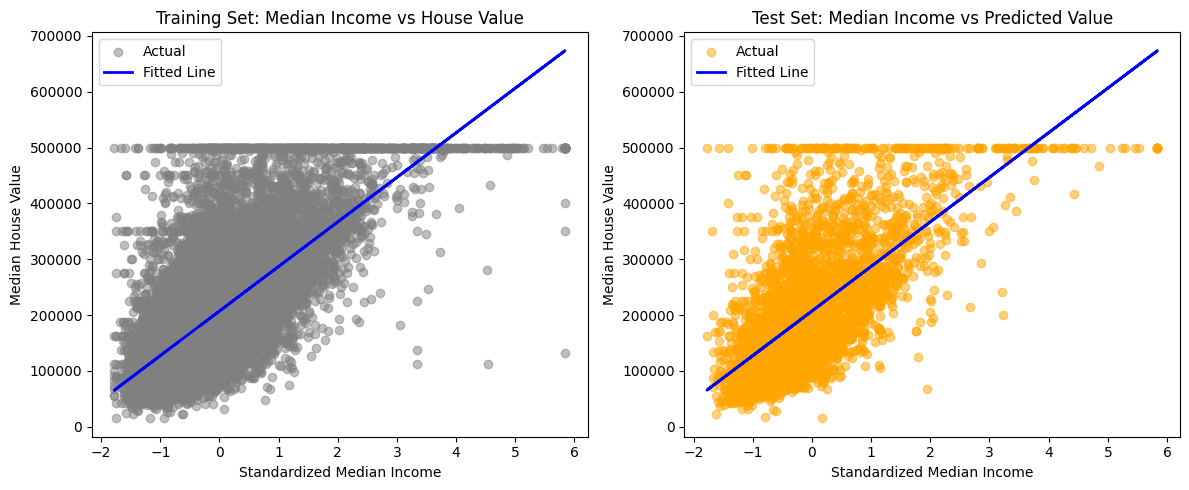

In [73]:
# 6. Plot regression for TRAINING data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_mi_scaled, y_train, color='gray', alpha=0.5, label='Actual')
plt.plot(X_train_mi_scaled, model_mi.predict(X_train_mi_scaled), color='blue', linewidth=2, label='Fitted Line')
plt.title("Training Set: Median Income vs House Value")
plt.xlabel("Standardized Median Income")
plt.ylabel("Median House Value")
plt.legend()

# 7. Plot regression for TEST data
plt.subplot(1, 2, 2)
plt.scatter(X_test_mi_scaled, y_test, color='orange', alpha=0.5, label='Actual')
plt.plot(X_test_mi_scaled, y_pred_mi, color='blue', linewidth=2, label='Fitted Line')
plt.title("Test Set: Median Income vs Predicted Value")
plt.xlabel("Standardized Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.tight_layout()
plt.show()


Based on the visualization of the linear regression results using the median_income feature, the model is able to capture the basic trend that an increase in median income is positively correlated with the median house value. This is evident from the upward regression line in both the training and test datasets.

However, there are some limitations to the model:

-Many house values are capped at 500,000, forming a flat line in the plot. This suggests that the data has a maximum price limit (top coding).

-The linear model fails to capture the complexity of the data, especially for high-income groups, as the relationship between income and house value is not entirely linear.

Therefore, while this simple model is useful for initial exploration, it is recommended to consider using a non-linear model or adding more features to improve prediction accuracy.

